In [10]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid
import keras

# first installed Tensorflow with pip install Tensorflow
# then installed keras using pip install Keras
# see https://keras.io/guides/ for an introduction to Keras sufficient for us

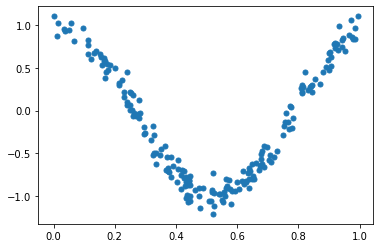

In [11]:
# generate synthetic data to illustrate using neural networks for nonlinear regression
ntrain = 200
Xtrain = np.random.rand(ntrain,1)
ytrain = np.cos(6*Xtrain) + np.random.randn(ntrain,1)*0.1

# plot the data
plt.figure()
plt.plot(Xtrain, ytrain, '.', markersize=10)
plt.show()

In [12]:
# setup the nn architecture
model = Sequential()
model.add(keras.Input(shape=(1,)))
model.add(Dense(300, activation=sigmoid, name="hidden")) #300 is d_out, dimensionality of output space
model.add(Dense(1, activation='linear', name="output"))

# compile the model (note that we didn't initialize or choose the optimizer hyperparameters: Keras uses sane defaults)
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model.fit(Xtrain, ytrain, epochs=10000, verbose=0) # we didn't specify the input dimensionality, so when we first call the model, it will fix it to the size (1) of the input data

# evaluate
training_loss = model.evaluate(Xtrain, ytrain, verbose=0)
print(training_loss)

0.011651814915239811


In [13]:
model.summary()
print(training_loss)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 300)               600       
_________________________________________________________________
output (Dense)               (None, 1)                 301       
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
0.011651814915239811


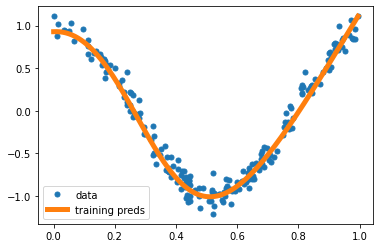

In [14]:
# plot the model results
plt.plot(Xtrain, ytrain, '.', markersize=10, label="data")

grid = np.linspace(np.min(Xtrain), np.max(Xtrain), 1000)[:, None]
ypred = model.predict(grid)

plt.plot(grid, ypred, linewidth=5, label="training preds")
plt.legend()
plt.show()